In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv('lca_data_20210405.csv')
df

,Data Classification,Category,Subcategory,Type,Value,Citation
0,Bio-Power,Feed Stock,Agricultural Residues,harmonized,28.000000,"Elsayed, 2003"
1,Bio-Power,Feed Stock,Agricultural Residues,harmonized,32.000000,"European Commission, 1999"
2,Bio-Power,Feed Stock,Agricultural Residues,harmonized,35.000000,"European Commission, 1999"
3,Bio-Power,Feed Stock,Agricultural Residues,harmonized,23.000000,"G&#228;rtner, 2008"
4,Bio-Power,Feed Stock,Agricultural Residues,harmonized,23.000000,"G&#228;rtner, 2008"
...,...,...,...,...,...,...
1527,Coal,Supercritical,NaN,harmonized,770.162500,"Wibberley, 2001"
1528,Coal,Supercritical,NaN,harmonized,754.970612,"Wibberley, 2001"
1529,Coal,Supercritical,NaN,harmonized,770.882500,"Wibberley, 2001"
1530,Coal,Supercritical,NaN,harmonized,785.754615,"Zerlia, 2003"


In [20]:
categories = list(set(df['Data Classification']))
categories.sort()
# print(categories.sort())
print(categories)

values = []
for c in categories:
    # if c != 'Bio-Power':
    #     continue
    vals = df[df['Data Classification'] == c]['Value'].to_numpy()
    # print(c)
    # print(vals)
    values.append(vals)

print(values)

['Bio-Power', 'Coal', 'Geothermal', 'Hydropower', 'Natural Gas', 'Nuclear', 'PV', 'Wind']
Bio-Power
[ 28.    32.    35.    23.    23.    18.    23.    18.    18.    48.
  65.    91.    69.    37.     5.4   13.     0.85 130.   110.    16.
  53.    17.    54.     2.1    3.3   24.    45.    42.    52.    24.
   8.5   58.    57.    88.    95.    95.    69.    58.   120.    45.
  30.     6.8   23.     3.3    4.3   35.    56.    45.    46.    54.
 300.    29.    14.    14.     8.5   12.    76.   170.   170.   170.
  27.    26.    60.    45.    43.    34.    29.     2.2   45.    78.
  56.    34.    11.     7.    18.    12.    12.    16.    83.    82.
  13.    21.    18.    11.    18.    44.    35.    43.    45.    40.
  40.    42.    14.    22.    85.    71.    56.    31.    61.    42.
 120.    40.    41.    50.    51.    45.    59.    36.    32.    55.
  54.    47.    49.    35.    16.    55.    60.    56.    60.    21.
  69.    78.   110.     3.5   60.   100.   100.   100.     5.     7.
   

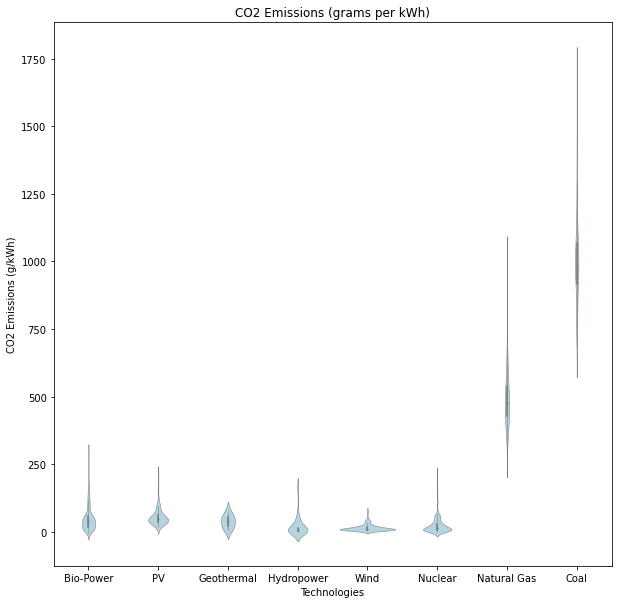

In [51]:
# https://openei.org/apps/LCA/

fig = plt.figure(figsize=(10,10))
# seaborn.violinplot(ax=ax, data=df, **violin_options)
ax = sns.violinplot(x=df['Data Classification'], y=df['Value'], color="lightblue", linewidth=0.5)
ax.set_title("CO2 Emissions (grams per kWh)")
ax.set_ylabel("CO2 Emissions (g/kWh)")
ax.set_xlabel("Technologies")
plt.show()

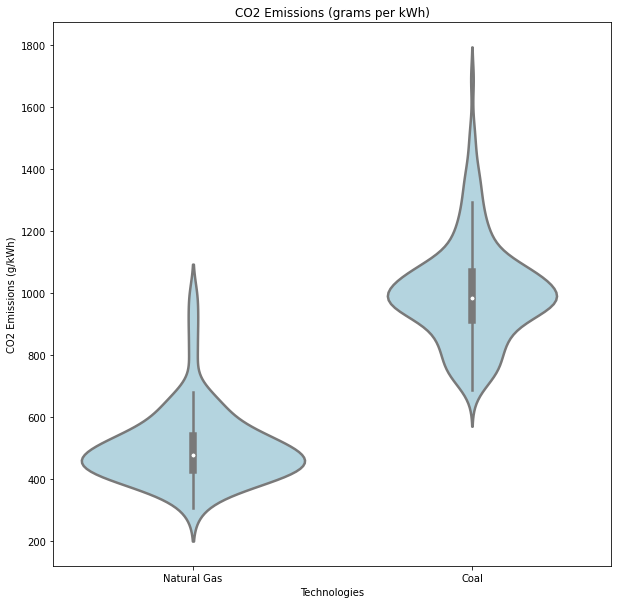

In [49]:
fig = plt.figure(figsize=(10,10))
# seaborn.violinplot(ax=ax, data=df, **violin_options)
ax = sns.violinplot(x=df[df['Data Classification'].isin(['Natural Gas', 'Coal'])]['Data Classification'], y=df[df['Data Classification'].isin(['Natural Gas', 'Coal'])]['Value'], color="lightblue", linewidth=2.5)
ax.set_title("CO2 Emissions (grams per kWh)")
ax.set_ylabel("CO2 Emissions (g/kWh)")
ax.set_xlabel("Technologies")
plt.show()

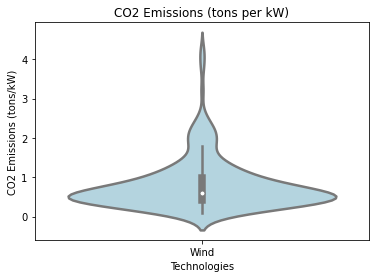

In [54]:
# Based on CF = 0.3, lifetime 20 years

df['ValueIndirectWind'] = 1e-6 * df['Value'] * 8760 * 0.3 * 20
ax = sns.violinplot(x=df[df['Data Classification'].isin(['Wind'])]['Data Classification'], y=df[df['Data Classification'].isin(['Wind'])]['ValueIndirectWind'], color="lightblue", linewidth=2.5)
ax.set_title("CO2 Emissions (tons per kW)")
ax.set_ylabel("CO2 Emissions (tons/kW)")
ax.set_xlabel("Technologies")
plt.show()

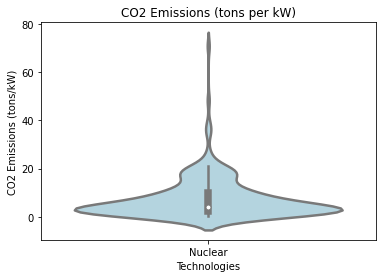

In [103]:
# Solar: Based on CF = 0.15 (includes performance ratio), lifetime 30 years, 68% penalty from degradation

# lifetime = 30
# cf = 0.15
# r = 0.007
# production = 0
# for i in range(lifetime):
#     production += 8760 * cf * (1-r)**i * 0.75
# production / (8760 * lifetime * cf)

# Wind: Based on CF = 0.3, lifetime 20 years

# Nuclear: Based on CF = 0.92, lifetime 40 years

import numpy as np
df['ValueIndirectSolar'] = 1e-6 * df['Value'] * 8760 * 0.15 * 30 * 0.68
df['ValueIndirectWind'] = 1e-6 * df['Value'] * 8760 * 0.3 * 20
df['ValueIndirectNuclear'] = 1e-6 * df['Value'] * 8760 * 0.92 * 40
# df[df['ValueIndirectNuclear'] > 20] = 0
# print(df[df['Data Classification'] == 'Nuclear']['ValueIndirect'])

df['ValueIndirect'] = df.apply(lambda x: x['ValueIndirectSolar'] if x['Data Classification']=='PV' else (x['ValueIndirectWind'] if x['Data Classification']=='Wind' else x['ValueIndirectNuclear']), axis=1)
# df['A'] = df.apply(lambda x: x['B'] if x['A']==0 else x['A'], axis=1)

ax = sns.violinplot(x=np.array(df[df['Data Classification'].isin(['Nuclear'])]['Data Classification']), y=df[df['Data Classification'].isin(['Nuclear'])]['ValueIndirect'], color="lightblue", linewidth=2.5)
ax.set_title("CO2 Emissions (tons per kW)")
ax.set_ylabel("CO2 Emissions (tons/kW)")
ax.set_xlabel("Technologies")
plt.show()